In [ ]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics  import recall_score,precision_score,f1_score,plot_roc_curve
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from google.colab import files 
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
missing_values=["NaN","na","n/a"]
dataset=pd.read_csv('heart.csv',na_values=missing_values)

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,NaN,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,NaN,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241.0,0,1,123,1,0.2,1,0,3,0
299,45.0,1,3,110,264.0,0,1,132,0,1.2,1,0,3,0
300,NaN,1,0,144,193.0,1,1,141,0,3.4,1,2,3,0
301,57.0,1,0,130,131.0,0,1,115,1,1.2,1,1,3,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,303.000000,303.000000,303.000000,275.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.308511,0.683168,0.966997,131.623762,246.949091,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.051486,0.466011,1.032052,17.538143,52.858138,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,209.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset['age']

0      63.0
1      37.0
2      41.0
3      56.0
4       NaN
       ... 
298    57.0
299    45.0
300     NaN
301    57.0
302    57.0
Name: age, Length: 303, dtype: float64

In [ ]:
dataset['age'].median()

55.0

In [ ]:
median=dataset['age'].median()
dataset['age'].fillna(median, inplace=True)

In [ ]:
dataset['age']

0      63.0
1      37.0
2      41.0
3      56.0
4      55.0
       ... 
298    57.0
299    45.0
300    55.0
301    57.0
302    57.0
Name: age, Length: 303, dtype: float64

In [ ]:
dataset['chol']

0      233.0
1        NaN
2      204.0
3      236.0
4      354.0
       ...  
298    241.0
299    264.0
300    193.0
301    131.0
302      NaN
Name: chol, Length: 303, dtype: float64

In [ ]:
dataset['chol'].median()

242.0

In [ ]:
median=dataset['chol'].median()
dataset['chol'].fillna(median, inplace=True)

In [ ]:
dataset['chol']

0      233.0
1      242.0
2      204.0
3      236.0
4      354.0
       ...  
298    241.0
299    264.0
300    193.0
301    131.0
302    242.0
Name: chol, Length: 303, dtype: float64

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,242.0,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,55.0,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
35,46.0,0,2,142,177.0,0,0,160,1,1.4,0,0,2,1
48,53.0,0,2,128,216.0,0,0,115,0,0.0,2,0,0,1
281,52.0,1,0,128,204.0,1,1,156,1,1.0,1,0,0,0
172,58.0,1,1,120,284.0,0,0,160,0,1.8,1,0,2,0
125,34.0,0,1,118,210.0,0,1,192,0,0.7,2,0,2,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.356436,0.683168,0.966997,131.623762,246.491749,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,8.732884,0.466011,1.032052,17.538143,50.368632,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.215729
trestbps    0.144931
restecg     0.137230
chol        0.073161
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


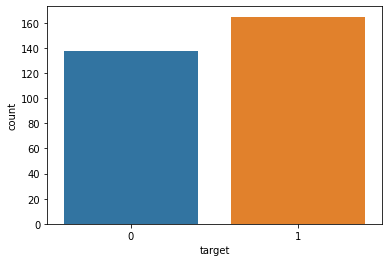

In [ ]:
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


**HEART DISEASE COMPARISON BETWEEN SEX**

In [ ]:
dataset.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(dataset.target,dataset.sex)

sex,0,1
target,,
0,24,114
1,72,93


0 - FEMALE 1- MALE

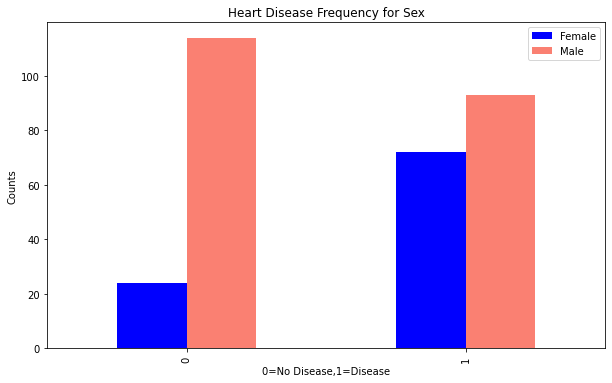

In [ ]:
pd.crosstab(dataset.target,dataset.sex).plot(kind="bar",figsize=(10,6),color=["blue","salmon"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Counts")
plt.legend(["Female","Male"])

**AGE VS MAXIMUM HEART RATE(thalach)**

In [ ]:
dataset["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

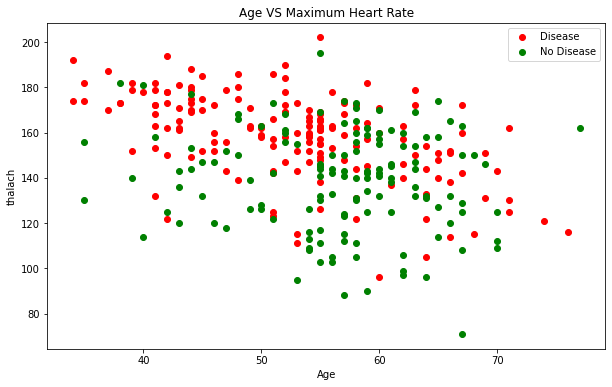

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dataset.age[dataset.target==1],dataset.thalach[dataset.target==1],c="red")
plt.scatter(dataset.age[dataset.target==0],dataset.thalach[dataset.target==0],c="green")
plt.title("Age VS Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.legend(["Disease","No Disease"]);

**ANALYSIS**

1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


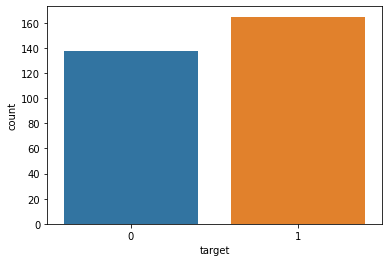

In [ ]:
pic=dataset['target']
sns.countplot(pic)
print(dataset.target.value_counts())

**TARGET** **IN** **PERCENTAGE**

In [ ]:
tar=dataset.target.value_counts()
print("Patient Heart Disease Percentage:")
print("Patient with Heart Problem Percentage:"+ str(round(tar[0]*100/303,2)))
print("Patient without Heart Problem Percentage:"+ str(round(tar[1]*100/303,2)))

Patient Heart Disease Percentage:
Patient with Heart Problem Percentage:45.54
Patient without Heart Problem Percentage:54.46


**SEX ANALYSIS**

male:207
female:96


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


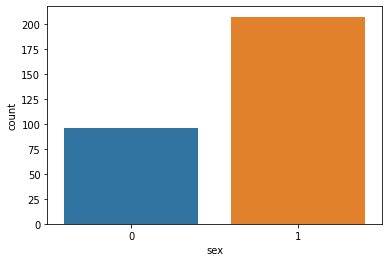

In [ ]:
s=dataset.sex.value_counts()
print("male:"+str(s[1]))
print("female:"+str(s[0]))
sns.countplot(dataset['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


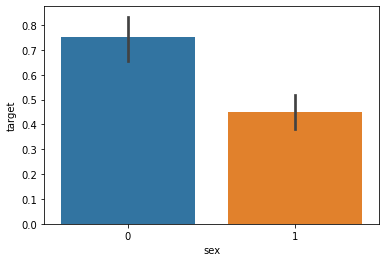

In [ ]:
sns.barplot(dataset['sex'],dataset['target'])

**Female :0
Male   :1
 Females are affected with heart disease more. Females' bar is high in that barplot.**

In [ ]:
dataset['sex'].unique()

array([1, 0])

**CHEST PAIN ANALYSIS**

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

**4 TYPES OF CHEST PAIN**

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


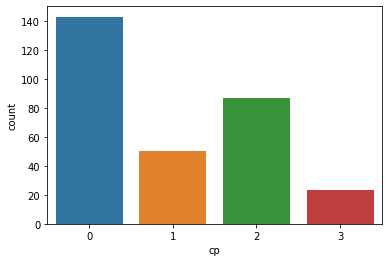

In [ ]:
cp_count=dataset.cp.value_counts()
sns.countplot(dataset['cp'])
print(cp_count)

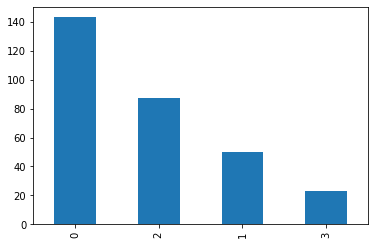

In [ ]:
cp_count.plot(kind="bar")

In [ ]:
dataset['cp'].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [ ]:
cros=pd.crosstab(dataset['cp'],dataset['target'])
cros

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


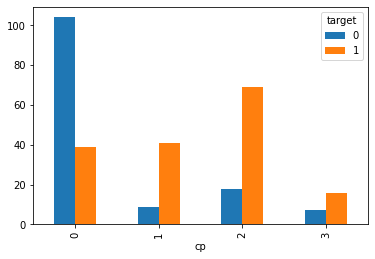

In [ ]:
cros.plot(kind="bar")

**FULL PERCENTAGE COMPARISON**

In [ ]:
cros[0][0]

104

In [ ]:
print("Chest Pain Type 0:")
print("Percentage without Heart Disease :"+str(round(cros[0][0]*100/303,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][0]*100/303,2)))

Chest Pain Type 0:
Percentage without Heart Disease :34.32
Percentage with Heart Disease :12.87


In [ ]:
print("Chest Pain Type 1:")
print("Percentage without Heart Disease :"+str(round(cros[0][1]*100/303,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][1]*100/303,2)))

Chest Pain Type 1:
Percentage without Heart Disease :2.97
Percentage with Heart Disease :13.53


In [ ]:
print("Chest Pain Type 2:")
print("Percentage without Heart Disease :"+str(round(cros[0][2]*100/303,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][2]*100/303,2)))

Chest Pain Type 2:
Percentage without Heart Disease :5.94
Percentage with Heart Disease :22.77


In [ ]:
print("Chest Pain Type 3:")
print("Percentage without Heart Disease :"+str(round(cros[0][3]*100/303,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][3]*100/303,2)))

Chest Pain Type 3:
Percentage without Heart Disease :2.31
Percentage with Heart Disease :5.28


**With Heart Disease:**

 Highest Heart Disease: Type 2-(22.77)

 Lowest  Heart Disease: Type 3-(5.28)

 **Without Heart Disease:**

 Highest without Heart Disease: Type 0-(34.32)

 Lowest  without Heart Disease: Type 3-(2.31)


In [ ]:
dataset.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
print("Chest Pain Type 0:")
print("Percentage without Heart Disease :"+str(round(cros[0][0]*100/143,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][0]*100/143,2)))

Chest Pain Type 0:
Percentage without Heart Disease :72.73
Percentage with Heart Disease :27.27


In [ ]:
print("Chest Pain Type 1:")
print("Percentage without Heart Disease :"+str(round(cros[0][1]*100/50,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][1]*100/50,2)))

Chest Pain Type 1:
Percentage without Heart Disease :18.0
Percentage with Heart Disease :82.0


In [ ]:
print("Chest Pain Type 2:")
print("Percentage without Heart Disease :"+str(round(cros[0][2]*100/87,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][2]*100/87,2)))

Chest Pain Type 2:
Percentage without Heart Disease :20.69
Percentage with Heart Disease :79.31


In [ ]:
print("Chest Pain Type 3:")
print("Percentage without Heart Disease :"+str(round(cros[0][3]*100/23,2)))
print("Percentage with Heart Disease :"+str(round(cros[1][3]*100/23,2)))

Chest Pain Type 3:
Percentage without Heart Disease :30.43
Percentage with Heart Disease :69.57


**With Heart Disease:**

 Highest Heart Disease: Type 1-(82.0)

 Lowest  Heart Disease: Type 0-(27.27)

 **Without Heart Disease:**

 Highest without Heart Disease: Type 0-(72.73)

 Lowest  without Heart Disease: Type 1-(18.0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


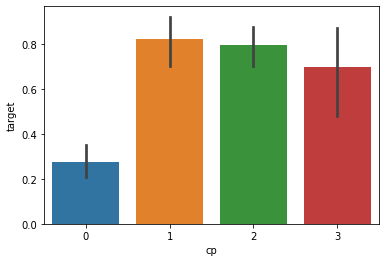

In [ ]:
sns.barplot(dataset['cp'],dataset['target'])

**From the barplot, we know that the No 1 Type of Chest Pain is affected with Heart Disease More.**

**Analysis of Fasting Blood Sugar**

In [ ]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

In [ ]:
fbs_count=dataset.fbs.value_counts()
fbs_count

0    258
1     45
Name: fbs, dtype: int64

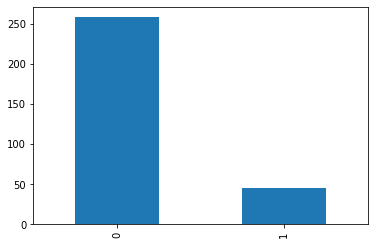

In [ ]:
fbs_count.plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


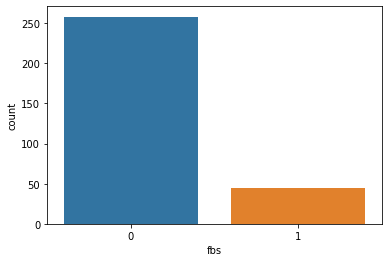

In [ ]:
sns.countplot(dataset['fbs'])

In [ ]:
fbs_cros=pd.crosstab(dataset['fbs'],dataset['target'])
fbs_cros


target,0,1
fbs,,
0,116,142
1,22,23


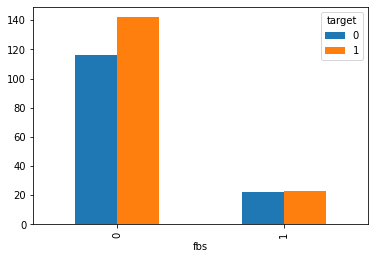

In [ ]:
fbs_cros.plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


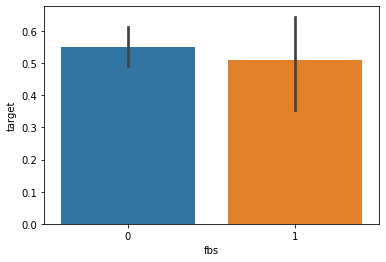

In [ ]:
sns.barplot(dataset['fbs'],dataset['target'])

**We do not find much of a differnce with fbs and without fbs, these two are in equal percentage of Heart Disease. Hence, cannot be exclusively used to predict the disease.**

**Analysis based on resting electrogaphic result:**

In [ ]:
dataset["restecg"].describe()

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

In [ ]:
restecg_count=dataset.restecg.value_counts()
restecg_count

1    152
0    147
2      4
Name: restecg, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


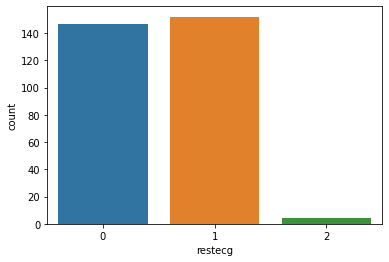

In [ ]:
sns.countplot(dataset['restecg'])

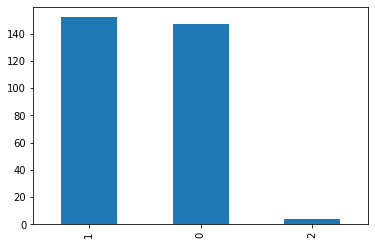

In [ ]:
restecg_count.plot(kind="bar")

In [ ]:
restecg_cros=pd.crosstab(dataset['restecg'],dataset['target'])
restecg_cros

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


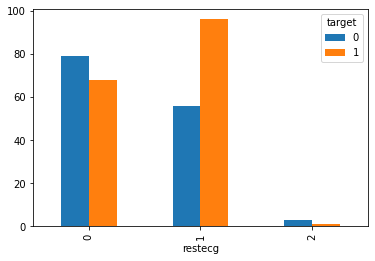

In [ ]:
restecg_cros.plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


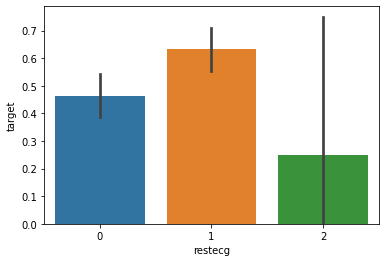

In [ ]:
sns.barplot(dataset['restecg'],dataset['target'])

**On looking at this bar diagram, we clearly understand that the type 1 creates High levels for Heart Disease.**

**Anlaysis of exercised induced angina**

In [ ]:
dataset["exang"].describe()

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64

In [ ]:
dataset["exang"].unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


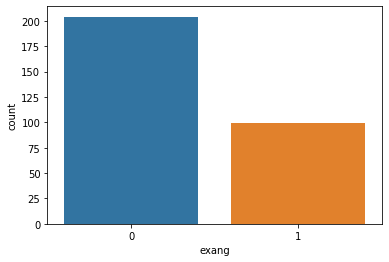

In [ ]:
exang_count=dataset.exang.value_counts()
exang_count
sns.countplot(dataset['exang'])

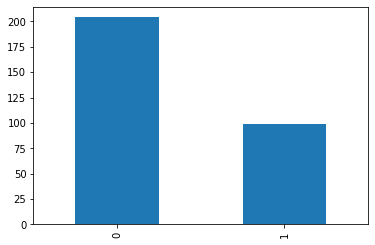

In [ ]:
exang_count.plot(kind="bar")

In [ ]:
pd.crosstab(dataset['exang'],dataset['target'])

target,0,1
exang,,
0,62,142
1,76,23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


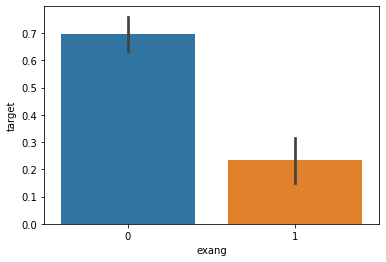

In [ ]:
sns.barplot(dataset['exang'],dataset['target'])

**We find that the person who doesn't do any exercise, get high heart disease ,the ones who did the exercise of angina their chance of getting a heart disease percentage is very less.Angina means Chest Pain. If we do the chest pain exercise, we might prevent the chances of getting a heart disease.**

**Analysis of Slope Peak**

In [ ]:
dataset["slope"].describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

In [ ]:
dataset['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [ ]:
pd.crosstab(dataset['slope'],dataset['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


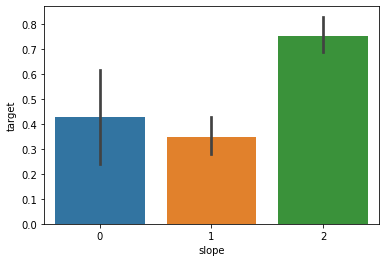

In [ ]:
sns.barplot(dataset['slope'],dataset['target'])

**The type 2 slope makes for higher rate of heart disease.**

**Analysis of Colored Vessels**

In [ ]:
dataset["ca"].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

In [ ]:
ca_count=dataset.ca.value_counts()
ca_count

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

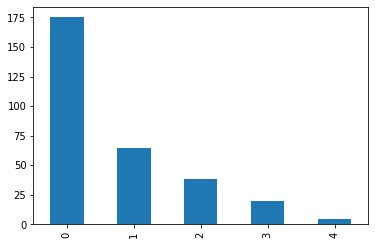

In [ ]:
ca_count.plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


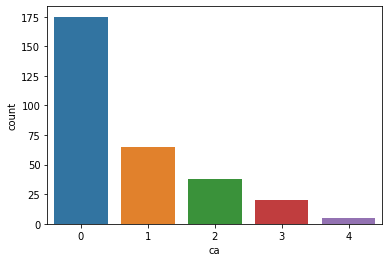

In [ ]:
sns.countplot(dataset['ca'])

In [ ]:
ca_cros=pd.crosstab(dataset['ca'],dataset['target'])
ca_cros

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


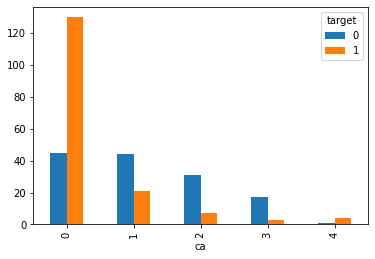

In [ ]:
ca_cros.plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


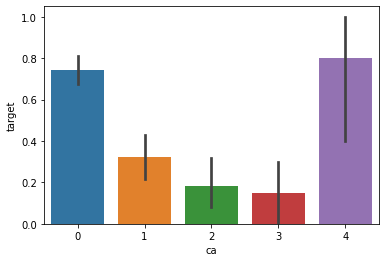

In [ ]:
sns.barplot(dataset['ca'],dataset['target'])

**Looking at the above plot, we infer that the Type 4 creates Higher Heart Disease ,Next is Type 0**

**Analysis of thal**

In [ ]:
dataset["thal"].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

In [ ]:
dataset.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
pd.crosstab(dataset['thal'],dataset['target'])

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


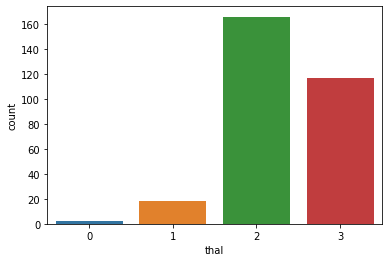

In [ ]:
sns.countplot(dataset['thal'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


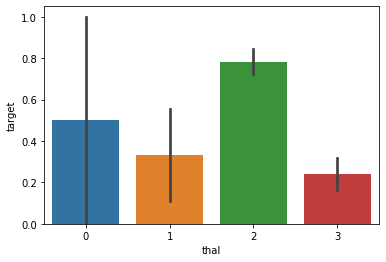

In [ ]:
sns.barplot(dataset['thal'],dataset['target'])

**The above graph clearly depicts that the No 2 creates High Heart Disease.**

**Correlation**

In [ ]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091766,-0.073272,0.267537,0.207138,0.098956,-0.135579,-0.387129,0.103884,0.196667,-0.164367,0.257783,0.049628,-0.215729
sex,-0.091766,1.000000,-0.049353,-0.056769,-0.206075,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.073272,-0.049353,1.000000,0.047608,-0.082304,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.267537,-0.056769,0.047608,1.000000,0.126656,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.207138,-0.206075,-0.082304,0.126656,1.000000,0.039842,-0.147103,-0.012208,0.064554,0.065108,-0.011575,0.080123,0.112984,-0.073161
fbs,0.098956,0.045032,0.094444,0.177531,0.039842,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.135579,-0.058196,0.044421,-0.114103,-0.147103,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.387129,-0.044020,0.295762,-0.046698,-0.012208,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.103884,0.141664,-0.394280,0.067616,0.064554,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.196667,0.096093,-0.149230,0.193216,0.065108,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


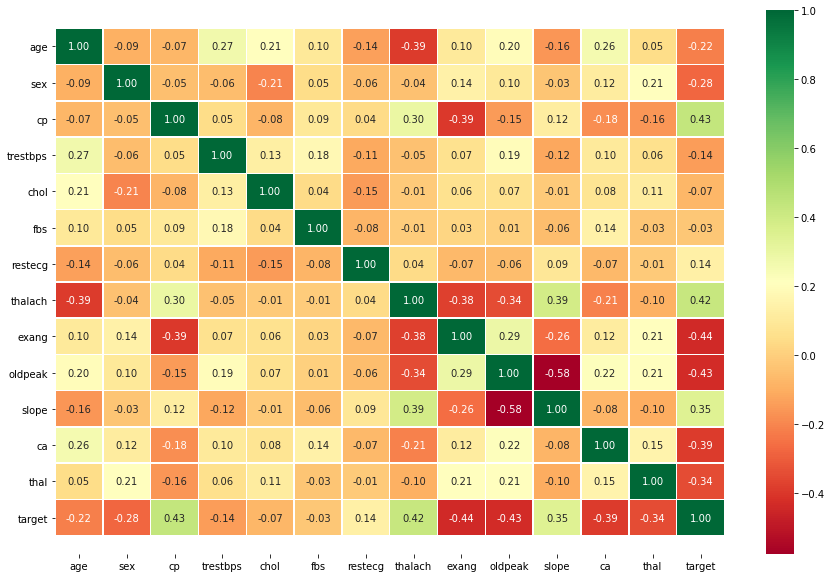

In [ ]:
corr_mat=dataset.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="RdYlGn");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top-0.5);

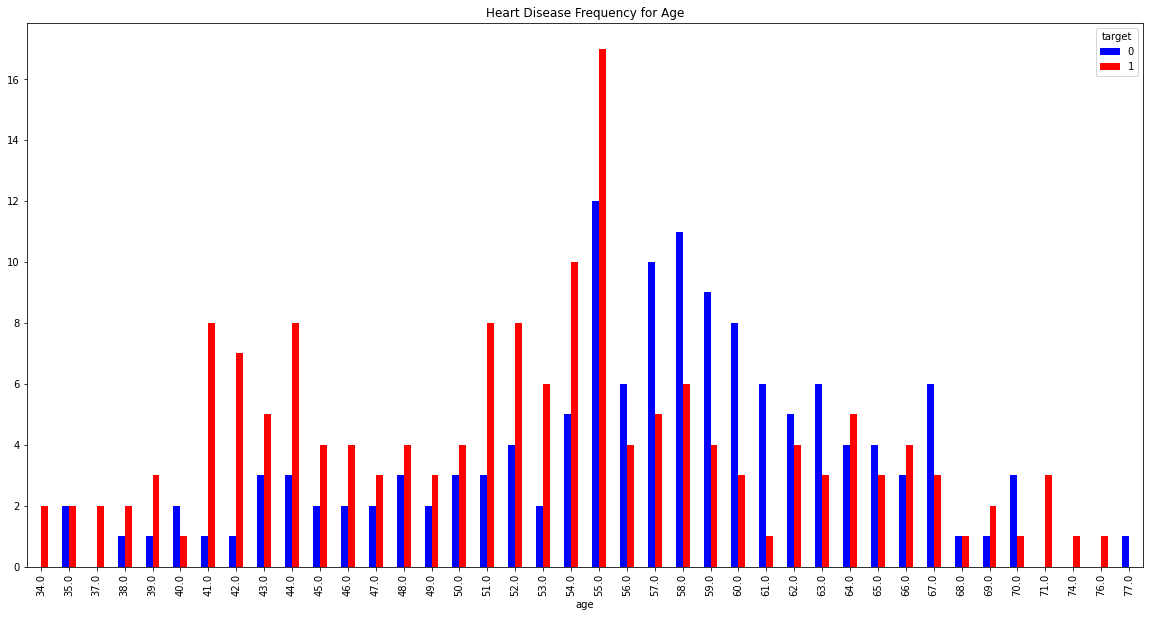

In [ ]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,10),color=["blue","red"])
plt.title("Heart Disease Frequency for Age");

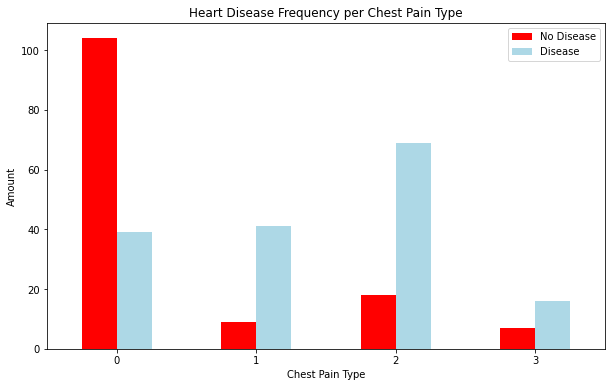

In [ ]:
pd.crosstab(dataset.cp,dataset.target).plot(kind="bar",figsize=(10,6),color=["red","lightblue" ])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

**Modelling**

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,242.0,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,55.0,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1


In [ ]:
x=dataset.drop('target',axis=1)
y=dataset['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1,3,145,233.0,1,0,150,0,2.3,0,0,1
1,37.0,1,2,130,242.0,0,1,187,0,3.5,0,0,2
2,41.0,0,1,130,204.0,0,0,172,0,1.4,2,0,2
3,56.0,1,1,120,236.0,0,1,178,0,0.8,2,0,2
4,55.0,0,0,120,354.0,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241.0,0,1,123,1,0.2,1,0,3
299,45.0,1,3,110,264.0,0,1,132,0,1.2,1,0,3
300,55.0,1,0,144,193.0,1,1,141,0,3.4,1,2,3
301,57.0,1,0,130,131.0,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(242, 13)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43.0,0,2,122,213.0,0,1,165,0,0.2,1,0,2
153,66.0,0,2,146,278.0,0,0,152,0,0.0,1,1,2
64,55.0,1,2,140,211.0,1,0,165,0,0.0,2,0,2
296,63.0,0,0,124,197.0,0,1,136,1,0.0,1,0,2
287,57.0,1,1,154,242.0,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43.0,1,0,132,247.0,1,0,143,1,0.1,1,4,3
192,54.0,1,0,120,188.0,0,1,113,0,1.4,1,1,3
117,56.0,1,3,120,193.0,0,0,162,0,1.9,1,0,3
47,47.0,1,2,138,257.0,0,0,156,0,0.0,2,0,2


In [ ]:
x_test.shape

(61, 13)

In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70.0,1,0,145,174.0,0,1,125,1,2.6,0,0,3
152,55.0,1,3,170,227.0,0,0,155,0,0.6,1,0,3
228,59.0,1,3,170,288.0,0,0,159,0,0.2,1,0,3
201,60.0,1,0,125,258.0,0,0,141,1,2.8,1,1,3
52,62.0,1,2,130,231.0,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44.0,0,2,118,242.0,0,1,149,0,0.3,1,1,2
302,57.0,0,1,130,242.0,0,0,174,0,0.0,1,1,2
26,59.0,1,2,150,212.0,1,1,157,0,1.6,2,0,2
108,50.0,0,1,120,244.0,0,1,162,0,1.1,2,0,2


In [ ]:
y_train.shape

(242,)

In [ ]:
y_train

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 242, dtype: int64

In [ ]:
y_train,len(y_train)

(74     1
 153    1
 64     1
 296    0
 287    0
       ..
 251    0
 192    0
 117    1
 47     1
 172    0
 Name: target, Length: 242, dtype: int64, 242)

In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70.0,1,0,145,174.0,0,1,125,1,2.6,0,0,3
152,55.0,1,3,170,227.0,0,0,155,0,0.6,1,0,3
228,59.0,1,3,170,288.0,0,0,159,0,0.2,1,0,3
201,60.0,1,0,125,258.0,0,0,141,1,2.8,1,1,3
52,62.0,1,2,130,231.0,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44.0,0,2,118,242.0,0,1,149,0,0.3,1,1,2
302,57.0,0,1,130,242.0,0,0,174,0,0.0,1,1,2
26,59.0,1,2,150,212.0,1,1,157,0,1.6,2,0,2
108,50.0,0,1,120,244.0,0,1,162,0,1.1,2,0,2


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.356436,0.683168,0.966997,131.623762,246.491749,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,8.732884,0.466011,1.032052,17.538143,50.368632,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

**Random Forest Algorithm Implementation**

In [ ]:
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

90.16
1053


In [ ]:
y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The Accuracy Score Achieved by Random Forest Algorithm is: "+str(score_rf)+" Percentage")

The Accuracy Score Achieved by Random Forest Algorithm is: 90.16 Percentage


In [ ]:
temp=[[]]
temp=[[10,1,2,145,100,1,1,100,0,0.3,1,1,3]]

In [ ]:
ans=rf.predict(temp)
print(ans)

[0]


**Decision Tree Algorithm Implementation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [ ]:
print(y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


**Logistic Regression Algorithm Implementation**

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_test)

print(y_pred_lr)

y_pred_lr=accuracy_score(y_pred_lr,y_test)

print(y_pred_lr)


[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
0.8524590163934426


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
score_lr=round(y_pred_lr*100,2)
print("The Maximum Score obtained in using Logistic Regression Algorithm is: "+str(score_lr)+ " Percentage")

The Maximum Score obtained in using Logistic Regression Algorithm is: 85.25 Percentage


In [ ]:
model_scores=[score_lr,score_rf]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


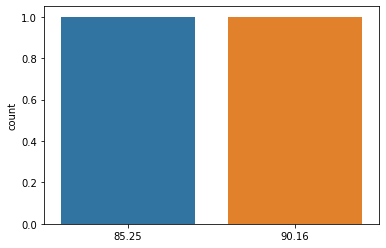

In [ ]:
model_compare=pd.DataFrame(model_scores)
sns.countplot(model_scores)


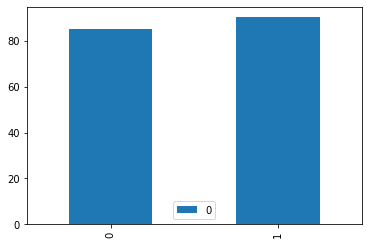

In [ ]:
model_compare.plot.bar()

In [ ]:
scores = [score_lr,score_dt,score_rf]
algorithms = ["Logistic Regression","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


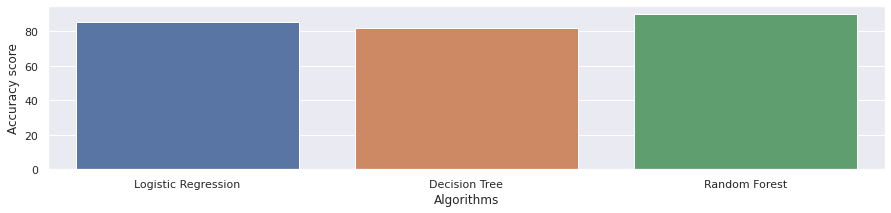

In [ ]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
mat=confusion_matrix(y_test,y_pred_rf)

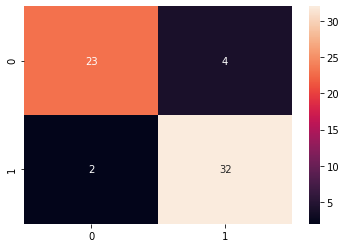

In [ ]:
sns.heatmap(mat,annot=True)

In [ ]:
from sklearn.externals import joblib
joblib.dump(rf,'rffile.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['rffile.pkl']

In [ ]:
rf1=joblib.load('rffile.pkl')

In [ ]:
ans=rf1.predict(temp)

In [ ]:
joblib.dump(rf,'rf_file.joblib')

['rf_file.joblib']

In [ ]:
print(ans)

[0]


In [ ]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_file.pkl')

['lr_file.pkl']

In [ ]:
import torch

In [ ]:
from torchvision import datasets,models,transforms

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_save_name='rffile.pkl'
path=F"/content/gdrive/My Drive/{model_save_name}"
torch.save(rf,path)